In [1]:
from scipy.stats import multivariate_normal
import numpy as np

import matplotlib.pyplot as plt
from track_linearization import make_track_graph, get_linearized_position

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1),
    )
)
position += multivariate_normal(mean=0, cov=0.05).rvs(position.shape)

node_positions = [
    (0, 0),  # xy position of node 0
    (30, 0),  # xy position of node 1
    (30, 30),  # xy position of node 2
    (0, 30),  # xy position of node 3
]

edges = [
    (0, 1),  # connects node 0 and node 1
    (0, 3),  # connects node 0 and node 3
    (1, 2),  # connects node 1 and node 2
]

track_graph = make_track_graph(node_positions, edges)

In [2]:
from non_local_detector.environment.geometry_engines import (
    list_available_engines,
)
list_available_engines()

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:54: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


['1D',
 'Delaunay',
 'Grid',
 'Hexagonal',
 'ImageMask',
 'Mask',
 'MaskedGrid',
 'Mesh',
 'MeshSurface',
 'Quadtree',
 'RegularGrid',
 'Shapely',
 'ShapelyGrid',
 'TrackGraph',
 'Voronoi']

## Default

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/environment/geometry_engines.py:523: UserWarning: position_range inferred as [(np.float64(-0.48246900990905867), np.float64(30.543114846445302)), (np.float64(-0.487033928698371), np.float64(30.40555427303532))] from position data.
  warnings.warn(


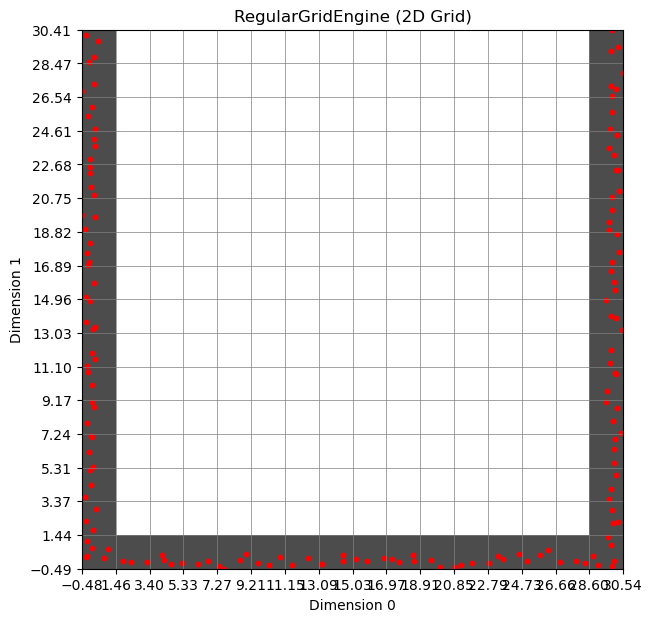

In [3]:
from non_local_detector.environment.environment_with_engine import Environment

env = Environment.from_positions(position=position, place_bin_size=2)

env.plot()

plt.scatter(position[:, 0], position[:, 1], color="red", s=10)

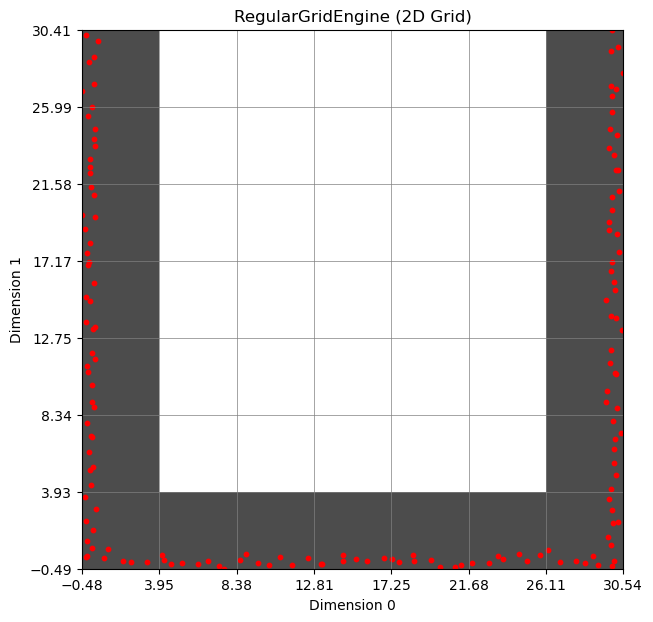

In [4]:
env = Environment.from_positions(position=position, place_bin_size=5)

env.plot()

plt.scatter(position[:, 0], position[:, 1], color="red", s=10)

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/environment/geometry_engines.py:1660: UserWarning: Hexagonal position_range inferred as ((np.float64(-0.48246900990905867), np.float64(30.543114846445302)), (np.float64(-0.487033928698371), np.float64(30.40555427303532)))
  warnings.warn(


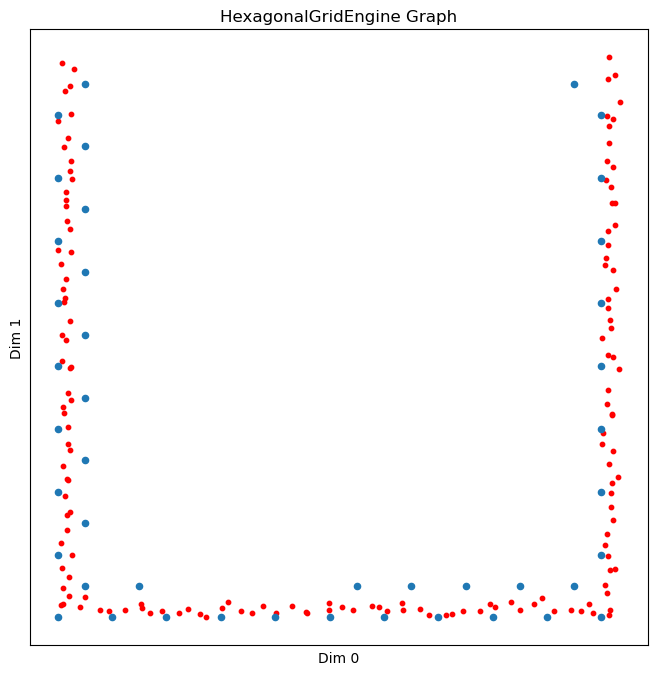

In [5]:
env = Environment.from_positions(
    position=position, place_bin_size=2, engine_kind="Hexagonal"
)

env.plot()

plt.scatter(position[:, 0], position[:, 1], color="red", s=10)

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/environment/geometry_engines.py:1660: UserWarning: Hexagonal position_range inferred as ((np.float64(-0.48246900990905867), np.float64(30.543114846445302)), (np.float64(-0.487033928698371), np.float64(30.40555427303532)))
  warnings.warn(


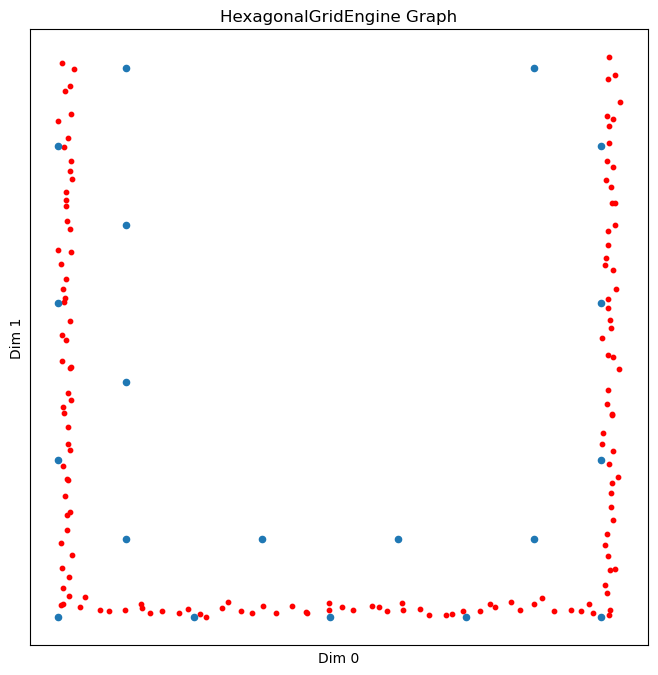

In [9]:
env = Environment.from_positions(
    position=position, place_bin_size=5, engine_kind="Hexagonal"
)

env.plot()

plt.scatter(position[:, 0], position[:, 1], color="red", s=10)

In [8]:
env = Environment.from_track_graph(
    track_graph=track_graph,
    edge_order=edges,
    edge_spacing=10,
    place_bin_size=2.0

)
env.plot()

IndexError: boolean index did not match indexed array along axis 1; size of axis is 39 but size of corresponding boolean axis is 1

Environment Elements
--------------------
- bin_centers: nodes
- bin_shape: rectangle grid, hexagon grid, voronoi, Delaunay triangle, mesh, quad tree, maybe doesn't make sense for track graph,
- edges: connectivity between bin_centers
- graph: nodes and edges
    - pos: bin_center
    - distance (euclidean distance between connected nodes)
- is_1D - is it a graph mapped to 1D line?
- 1D bin center
- 1D bin size/volume
- name
- range/extent
- shape (for rectangle/hexagon/quad tree grid)
- is_fitted
- kd_tree: way to quickly find bin and neighbor from points (mixin)

Note: decoder only works on interior nodes, only want to store interior nodes for memory, but should be able to reconstruct grid
Note: use decorators for easy checks for properties
Note: each bin will correspond to a state in the decoder, these bins will have multiple labels (env_name, position_bin, direction/task/state, movement_model)

Ways to Specify Environment
---------------------------
- from boundaries: from image mask, from existing mesh, from n-D mask, from Shapley polygon
- from positions: infer boundaries from positions, from range

Methods
-------
- need method to get area: in correct spatial units, possibly have a way to translate units from spatial units to pixels for overlay on video or image
- point_to_bin: Maps continuous spatial points to discrete bin indices.
- distance between bins
- get bin neighbors
- get graph
- bin center dataframe
- save
- load
- is_interior: check if point is within boundaries
- to_dict: Serializes the Environment object to a dictionary. Use nx.node_link_graph for graphs
- from_dict: Deserializes an Environment object from a dictionary.
- plot
- flat_ind_to_multi_ind
- multi_ind_to_flat
- get_geodesic_distance
- get_euclidean_distance
- geodesic_distance_between_bins (all bins)
- for 1D
    - project position to 1D
    - project 1D position to 2D
- regions: specific points or areas (maybe as mixin)
    - add regions: Register a region *name* using one of three specifiers. Exactly **one** of ``point``, ``mask`` or ``polygon`` must be given.
    - remove regions: Remove *name* from the registry (silently ignored if absent).
    - list_regions: Return a list of registered region names (in insertion order).
    - region_mask: Boolean occupancy mask for *name*
    - nearest_region: Nearest region to *position*.
    - region_center: Geometric center of the region.
    - bins_in_region: Return flattened indices of bins inside *name*.
    - plot_regions

In [11]:
np.ravel_multi_index?

Call signature:  np.ravel_multi_index(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <built-in function ravel_multi_index>
Docstring:      
ravel_multi_index(multi_index, dims, mode='raise', order='C')

Converts a tuple of index arrays into an array of flat
indices, applying boundary modes to the multi-index.

Parameters
----------
multi_index : tuple of array_like
    A tuple of integer arrays, one array for each dimension.
dims : tuple of ints
    The shape of array into which the indices from ``multi_index`` apply.
mode : {'raise', 'wrap', 'clip'}, optional
    Specifies how out-of-bounds indices are handled.  Can specify
    either one mode or a tuple of modes, one mode per index.

    * 'raise' -- raise an error (default)
    * 'wrap' -- wrap around
    * 'clip' -- clip to the range

    In 'clip' mode, a negative index which would normally
    wrap will clip to 0 instead.
order : {'C', 'F'}, optional
    Determines whether the multi-index should be vi